# Project 2
# Task 2
# Clustering 

In [17]:
import sklearn
print(sklearn.__version__)
import pandas as pd
import numpy as np

0.22.1


# Dataset 1

In [19]:
dataset = pd.read_fwf('3rings.txt', names=['c1','c2'])
dataset.to_csv('3rings.csv')

In [4]:
dataset.head()

,c1,c2
0,-0.019728,1.133361
1,1.152498,-0.121619
2,2.307014,0.025299
3,-1.893388,-1.387004
4,-0.972579,0.624264


In [3]:
dataset.shape

(900, 2)

In [20]:
X=dataset.c1
Y=dataset.c2

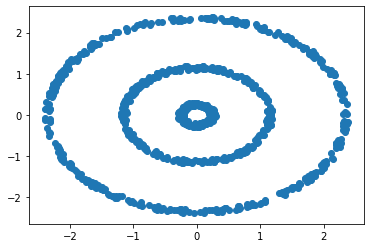

In [21]:
from matplotlib import pyplot
pyplot.scatter(X, Y)
# show the plot
pyplot.show()

We see that there are 3 clusters, so now we will put different colors, and this will be the perfect result that we want the algorithms to achieve.

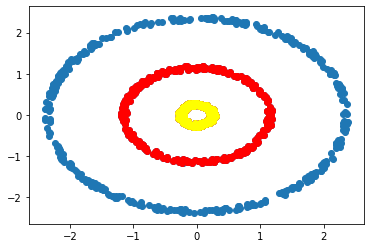

In [22]:
df1 = dataset.query('-1.5<=c1<=1.5 & -1.17<=c2<=1.7')
df2 = dataset.query('-0.5<=c1<=0.5 & -0.5<=c2<=0.5')
# scatter plot with matplotlib in Python
pyplot.scatter(X, Y)
# set plot title with specific size
pyplot.scatter(df1.c1, df1.c2, color="red")
pyplot.scatter(df2.c1, df2.c2, color="yellow")
pyplot.show()

Let's start to see if our algorithms will manage this result. We will use 3 algorithms:
1. kmeans
2. agglomerative clustering(single  link & average link)
3. spectral clustering (for different sigma values)

In [23]:
#bulid kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) #as we see that we have 3 rings
kmeans.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

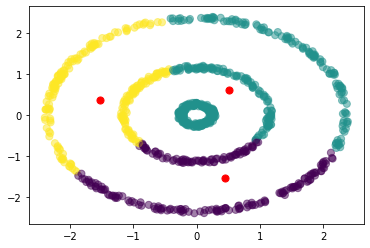

In [24]:
centroids = kmeans.cluster_centers_ #the centers
labels = kmeans.fit_predict(dataset)
pyplot.scatter(X, Y, c= labels, s=50, alpha=0.50)
pyplot.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
pyplot.show()

We see that, as we have rings it is difficult with standart clustering using kmeans to achieve a good result. Let's try spectral clustering!

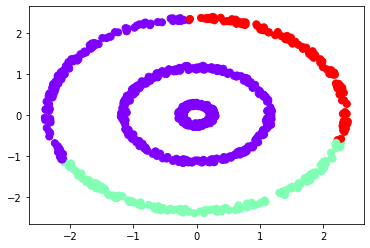

In [64]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='rbf',assign_labels='kmeans')
model.fit(dataset)
#labels_pred = model.labels_ #it returns cluster labels
labels_pred = model.fit_predict(dataset)
pyplot.scatter(dataset['c1'], dataset['c2'], c=labels_pred, s=50, cmap='rainbow');

# As we see, results are not so good! We will tune the sigma parameter!
that is used in the computation of the affinity matrix.!

In [25]:
from sklearn.metrics import pairwise_distances
A = np.exp(- (1/(2 * 0.05)) * pairwise_distances(dataset, metric='sqeuclidean'))

In [26]:
import scipy
from scipy.sparse import csgraph
L = csgraph.laplacian(A, normed=True)

In [27]:
from numpy import linalg
eigenvalues, eigenvectors = np.linalg.eig(L) #eigenvalues & eigenvectors of Laplacian matrix
#we want three clusters, we need the first 3 columns of eigenvectors
Y=eigenvectors[:, :3]

In [11]:
Y.shape

(900, 3)

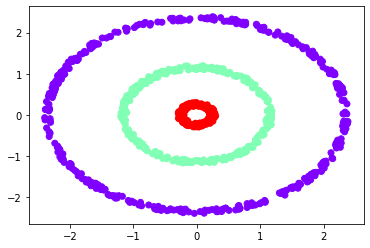

In [28]:
clusters = kmeans.fit_predict(Y)
pyplot.scatter(dataset['c1'], dataset['c2'], c=clusters, cmap='rainbow')
pyplot.show()

Using as sigma=1 is not good. With a Gaussian kernel and variance 1 we mean that points that were 1 unit apart would also be considered “nearby”. But if you look at the data, we have points in clusters, that are only about approximately 0.5 away from each other. I will fix this by simply replacing the 1 with something smaller such us 0.1 and 0.5! But we see that again it doesn't work. After trials we see that we need very little sigma value!For value 0.05 we have the result!
# How about agglomerative clustering? We already know that single linkage will work better for this type of data!

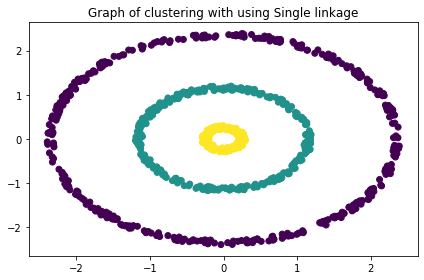

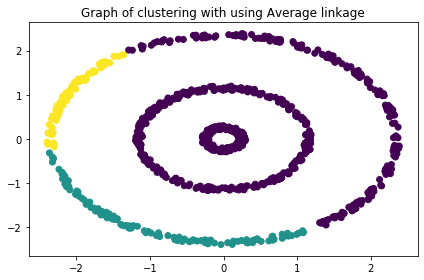

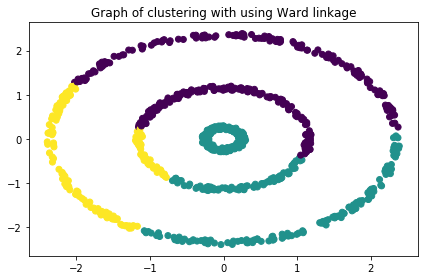

In [32]:
from sklearn.cluster import AgglomerativeClustering
models=[]
names=[]
models.append(('Single', AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')))
models.append(('Average',AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')))
models.append(('Ward',AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')))
for name, m in models:
    fig = pyplot.figure()
    m.fit(dataset)
    mlabels = m.labels_
    pyplot.scatter(dataset['c1'], dataset['c2'], c=mlabels)
    pyplot.title("Graph of clustering with using "+name+ " linkage")
    pyplot.tight_layout()    

As we expect agglomerative clustering gives also good results for using single linkage, and when trying the others we dont have nice results!

# Dataset 2

In [29]:
dataset = pd.read_fwf('3wings.txt', names=['col1','col2'])
dataset.to_csv('3wings.csv')
x=dataset.col1
y=dataset.col2

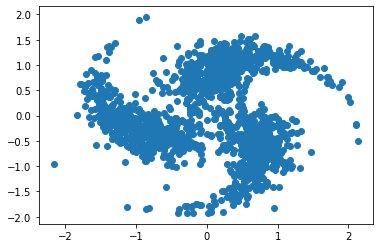

In [30]:
pyplot.scatter(x, y)
# show the plot
pyplot.show()

The ideal solution is:

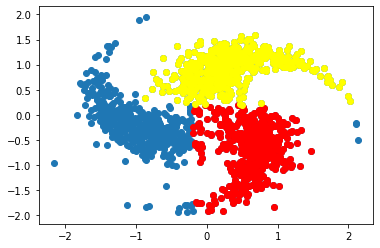

In [31]:
df1 = dataset.query('-0.2<=col1<=2 & -2<=col2<=0.2')
df2 = dataset.query('-1<=col1<=3 & 0.2<=col2<=1.8')
# scatter plot with matplotlib in Python
pyplot.scatter(x, y)
# set plot title with specific size
pyplot.scatter(df1.col1, df1.col2, color="red")
pyplot.scatter(df2.col1, df2.col2, color="yellow")
pyplot.show()

So the ideal clustering seems like this

# Kmeans

In [32]:
#bulid kmeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

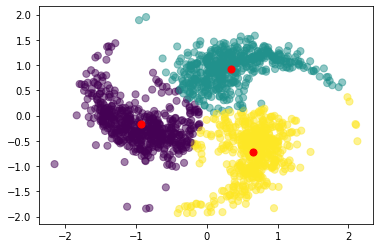

In [33]:
centroids = kmeans.cluster_centers_ #the centers
labels = kmeans.fit_predict(dataset)
pyplot.scatter(x, y, c= labels, s=50, alpha=0.50)
pyplot.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
pyplot.show()

We see that kmeans has amazing results!Let's see the others!

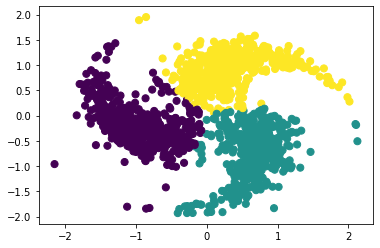

In [35]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='rbf',assign_labels='kmeans')
model.fit(dataset)
#labels_pred = model.labels_ #it returns cluster labels
labels_pred = model.fit_predict(dataset)
pyplot.scatter(dataset['col1'], dataset['col2'], c=labels_pred, s=50);

We see that spectral clustering works also well!

# Agglomerative

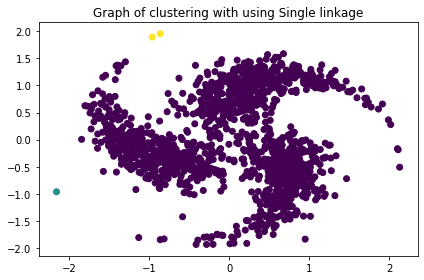

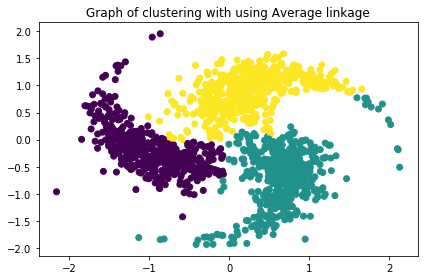

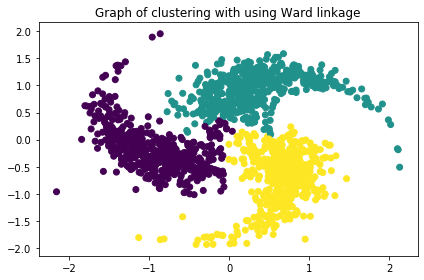

In [40]:
from sklearn.cluster import AgglomerativeClustering
models=[]
names=[]
models.append(('Single', AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')))
models.append(('Average',AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')))
models.append(('Ward',AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')))
for name, m in models:
    fig = pyplot.figure()
    m.fit(dataset)
    mlabels = m.labels_
    pyplot.scatter(dataset['col1'], dataset['col2'], c=mlabels)
    pyplot.title("Graph of clustering with using "+name+ " linkage")
    pyplot.tight_layout() 

Single linkage doesn't not work, we knew it as the points that are fur away, belong to the same cluster!!!

# Dataset 3

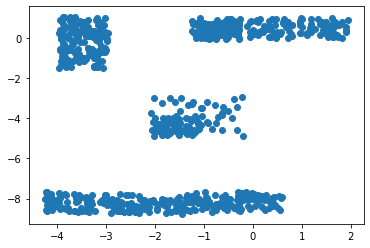

In [25]:
dataset = pd.read_fwf('4rectangles.txt', names=['col1','col2'])
dataset.to_csv('4rectangles.csv')
x=dataset.col1
y=dataset.col2
pyplot.scatter(x, y)
# show the plot
pyplot.show()

We can see 4 clusters. So the result we want is this:

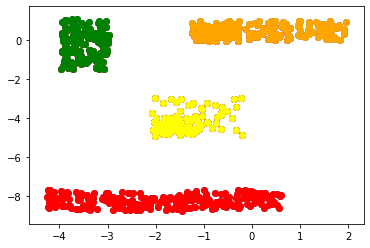

In [30]:
df1 = dataset.query('-5<=col1<=0.9 & -10<=col2<=0.7')
df2 = dataset.query('-2.5<=col1<=0 & -5.5<=col2<=-2')
df3 = dataset.query('-4<=col1<=-2.5 & -2<=col2<=2')
df4 = dataset.query('-2<=col1<=2.5 & -1<=col2<=1')

# scatter plot with matplotlib in Python
pyplot.scatter(x, y)
# set plot title with specific size
pyplot.scatter(df1.col1, df1.col2, color="red")
pyplot.scatter(df2.col1, df2.col2, color="yellow")
pyplot.scatter(df3.col1, df3.col2, color="green")
pyplot.scatter(df4.col1, df4.col2, color="orange")

pyplot.show()

Let's start.
# Kmeans

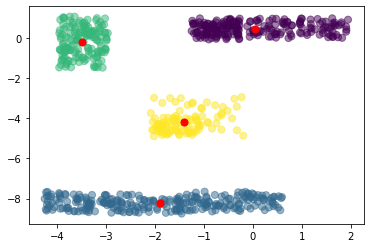

In [33]:
#bulid kmeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset)
centroids = kmeans.cluster_centers_ #the centers
labels = kmeans.fit_predict(dataset)
pyplot.scatter(x, y, c= labels, s=50, alpha=0.50)
pyplot.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
pyplot.show()

Perfect! 
# Spectral clustering

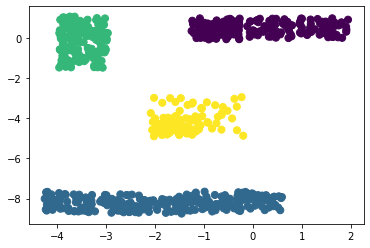

In [34]:
model = SpectralClustering(n_clusters=3, affinity='rbf',assign_labels='kmeans')
model.fit(dataset)
#labels_pred = model.labels_ #it returns cluster labels
labels_pred = model.fit_predict(dataset)
pyplot.scatter(dataset['col1'], dataset['col2'], c=labels, s=50);

Perfect again!

# Agglomerative

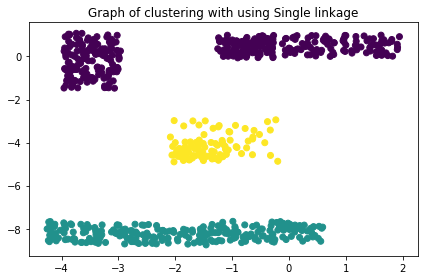

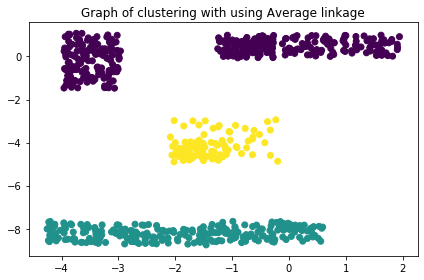

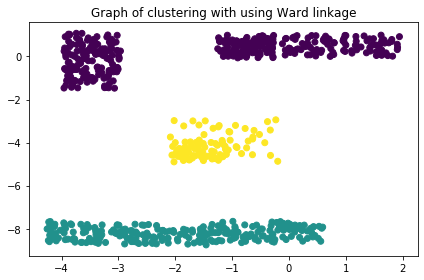

In [35]:
models=[]
names=[]
models.append(('Single', AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')))
models.append(('Average',AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')))
models.append(('Ward',AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')))
for name, m in models:
    fig = pyplot.figure()
    m.fit(dataset)
    mlabels = m.labels_
    pyplot.scatter(dataset['col1'], dataset['col2'], c=mlabels)
    pyplot.title("Graph of clustering with using "+name+ " linkage")
    pyplot.tight_layout() 

In this dataset, clusters were very clear seperated, so it was easier using every algorithm, without caring so much for hyperparameters, to have a good result !!
# Dataset 4

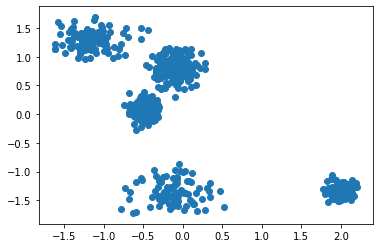

In [37]:
dataset = pd.read_fwf('5Gaussians.txt', names=['col1','col2'])
dataset.to_csv('5Gaussians.csv')
x=dataset.col1
y=dataset.col2
pyplot.scatter(x, y)
# show the plot
pyplot.show()

We see 5 clusters! so let's present the ideal clustering!

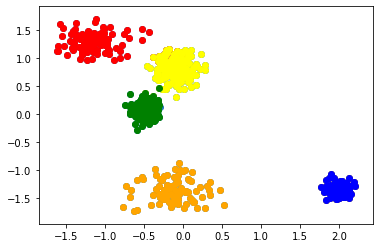

In [51]:
df1 = dataset.query('-3<=col1<=0 & 0.9<=col2<=2')
df2 = dataset.query('-0.5<=col1<=0.5 & 0.3<=col2<=1.2')
df3 = dataset.query('-1.5<=col1<=-0.3 & -0.5<=col2<=0.5')
df4 = dataset.query('-0.8<=col1<=2.5 & -2<=col2<=-0.5')
df5 = dataset.query('1.5<=col1<=3 & -2<=col2<=-0.5')

pyplot.scatter(x, y)
pyplot.scatter(df1.col1, df1.col2, color="red")
pyplot.scatter(df2.col1, df2.col2, color="yellow")
pyplot.scatter(df3.col1, df3.col2, color="green")
pyplot.scatter(df4.col1, df4.col2, color="orange")
pyplot.scatter(df5.col1, df5.col2, color="blue")


pyplot.show()

So this will be the perfect result.
# Kmeans

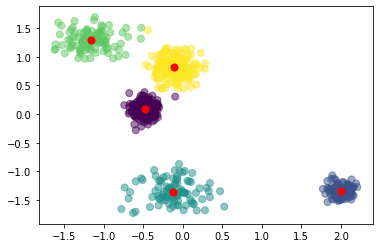

In [53]:
#bulid kmeans model
kmeans = KMeans(n_clusters=5)
kmeans.fit(dataset)
centroids = kmeans.cluster_centers_ #the centers
labels = kmeans.fit_predict(dataset)
pyplot.scatter(x, y, c= labels, s=50, alpha=0.50)
pyplot.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
pyplot.show()

# Spectral clustering

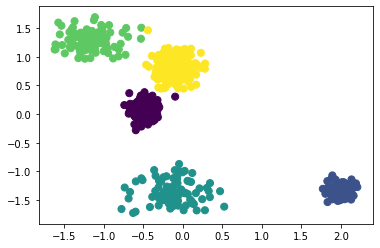

In [57]:
model = SpectralClustering(n_clusters=5, affinity='rbf',assign_labels='kmeans')
model.fit(dataset)
#labels_pred = model.labels_ #it returns cluster labels
labels_pred = model.fit_predict(dataset)
pyplot.scatter(dataset['col1'], dataset['col2'], c=labels, s=50);

# Agglomerative

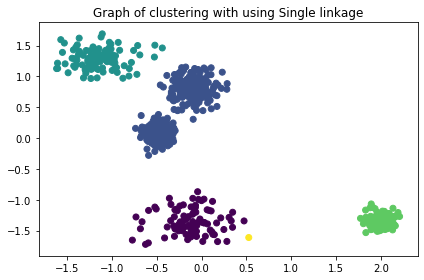

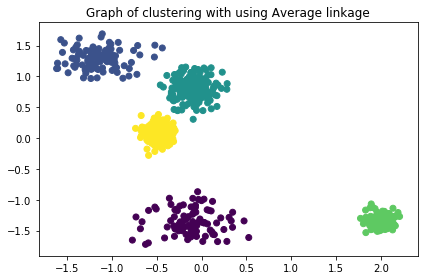

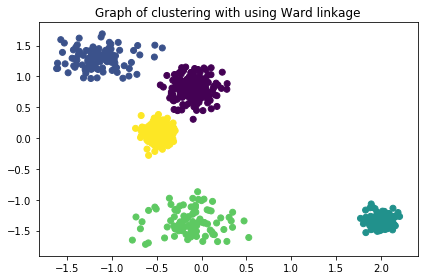

In [59]:
models=[]
names=[]
models.append(('Single', AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')))
models.append(('Average',AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')))
models.append(('Ward',AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')))
for name, m in models:
    fig = pyplot.figure()
    m.fit(dataset)
    mlabels = m.labels_
    pyplot.scatter(dataset['col1'], dataset['col2'], c=mlabels)
    pyplot.title("Graph of clustering with using "+name+ " linkage")
    pyplot.tight_layout() 

# Dataset 6

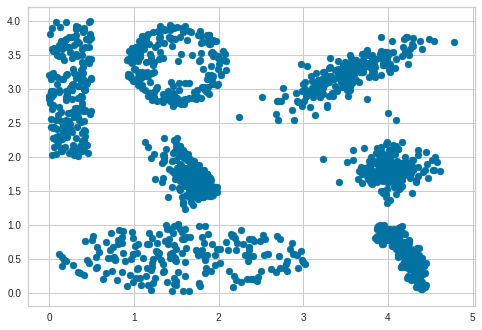

In [46]:
dataset = pd.read_fwf('7clusters.txt', names=['col1','col2'])
dataset.to_csv('7clusters.csv')
x=dataset.col1
y=dataset.col2
pyplot.scatter(x, y)
# show the plot
pyplot.show()

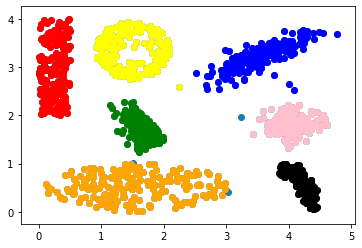

In [63]:
df1 = dataset.query('-0.8<=col1<=0.9 & 1.9<=col2<=4.5')
df2 = dataset.query('0.9<=col1<=2.4 & 2.5<=col2<=4')
df3 = dataset.query('1<=col1<=2.1 & 1.2<=col2<=2.4')
df4 = dataset.query('0<=col1<=3 & 0<=col2<=1')
df5 = dataset.query('2.4<=col1<=5 & 2.3<=col2<=3.8')
df6 = dataset.query('3.4<=col1<=4.8 & 1.3<=col2<=2.5')
df7 = dataset.query('3.8<=col1<=4.8 & 0<=col2<=1.2')

pyplot.scatter(x, y)
pyplot.scatter(df1.col1, df1.col2, color="red")
pyplot.scatter(df2.col1, df2.col2, color="yellow")
pyplot.scatter(df3.col1, df3.col2, color="green")
pyplot.scatter(df4.col1, df4.col2, color="orange")
pyplot.scatter(df5.col1, df5.col2, color="blue")
pyplot.scatter(df6.col1, df6.col2, color="pink")
pyplot.scatter(df7.col1, df7.col2, color="black")

pyplot.show()

so this is the clustering we want.
# Kmeans

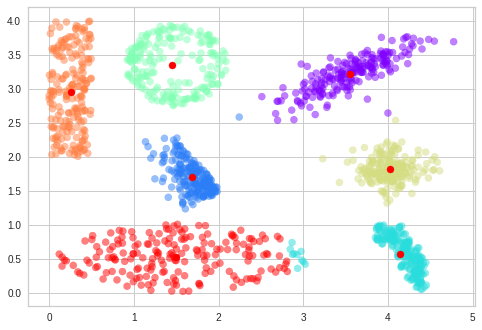

In [52]:
#bulid kmeans model
kmeans = KMeans(n_clusters=7)
kmeans.fit(dataset)
centroids = kmeans.cluster_centers_ #the centers
labels = kmeans.fit_predict(dataset)
pyplot.scatter(x, y, c= labels, s=50, alpha=0.50, cmap='rainbow')
pyplot.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
pyplot.show()

# spectral

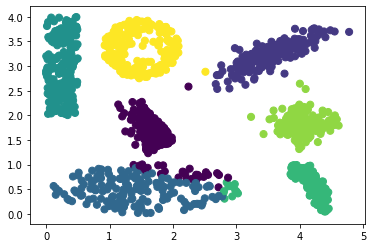

In [72]:
model = SpectralClustering(n_clusters=7, affinity='rbf',assign_labels='kmeans')
model.fit(dataset)
labels_pred = model.fit_predict(dataset)
pyplot.scatter(dataset['col1'], dataset['col2'], c=labels_pred, s=50);

# Agglomerative

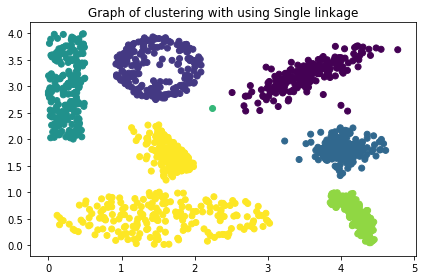

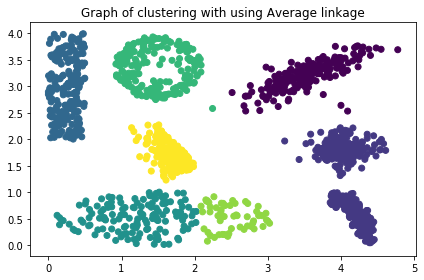

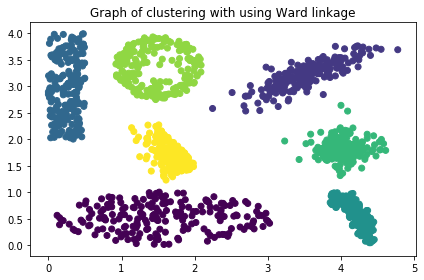

In [77]:
models=[]
names=[]
models.append(('Single', AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single')))
models.append(('Average',AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')))
models.append(('Ward',AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')))
for name, m in models:
    fig = pyplot.figure()
    m.fit(dataset)
    mlabels = m.labels_
    pyplot.scatter(dataset['col1'], dataset['col2'], c=mlabels)
    pyplot.title("Graph of clustering with using "+name+ " linkage")
    pyplot.tight_layout() 

# last dataset

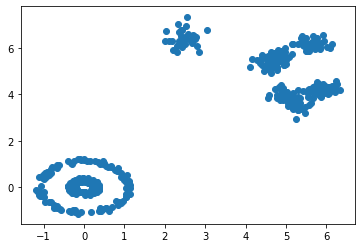

In [74]:
dataset = pd.read_fwf('gauss_ring.txt', names=['col1','col2'])
dataset.to_csv('gauss_ring.csv')
x=dataset.col1
y=dataset.col2
pyplot.scatter(x, y)
# show the plot
pyplot.show()

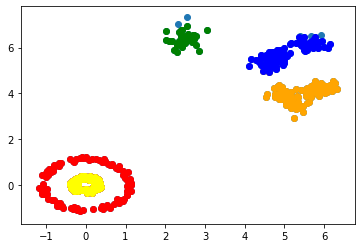

In [75]:
df1 = dataset.query('-3<=col1<=1.5 & -3<=col2<=1.5')
df2 = dataset.query('-0.5<=col1<=0.7 & -0.8<=col2<=0.5')
df3 = dataset.query('1.5<=col1<=3.4 & 5.5<=col2<=7')
df4 = dataset.query('4<=col1<=7 & 2<=col2<=5')
df5 = dataset.query('3.5<=col1<=6.3 & 4.7<=col2<=6.5')

pyplot.scatter(x, y)
pyplot.scatter(df1.col1, df1.col2, color="red")
pyplot.scatter(df2.col1, df2.col2, color="yellow")
pyplot.scatter(df3.col1, df3.col2, color="green")
pyplot.scatter(df4.col1, df4.col2, color="orange")
pyplot.scatter(df5.col1, df5.col2, color="blue")

pyplot.show()

This is the perfect clustering with 5 clusters!
# Kmeans

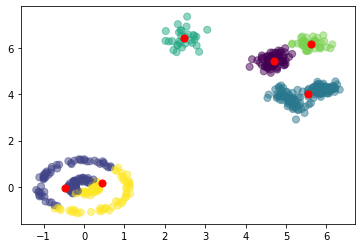

In [76]:
#bulid kmeans model
kmeans = KMeans(n_clusters=6)
kmeans.fit(dataset)
centroids = kmeans.cluster_centers_ #the centers
labels = kmeans.fit_predict(dataset)
pyplot.scatter(x, y, c= labels, s=50, alpha=0.50)
pyplot.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
pyplot.show()

As we expected it doesnt work!

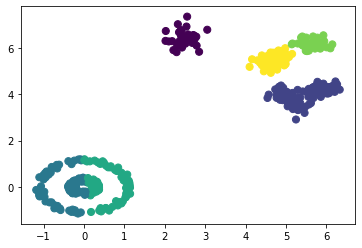

In [77]:
model = SpectralClustering(n_clusters=6, affinity='rbf',assign_labels='kmeans')
model.fit(dataset)
labels_pred = model.fit_predict(dataset)
pyplot.scatter(dataset['col1'], dataset['col2'], c=labels_pred, s=50);

It doesn't work, we will tune sigma:

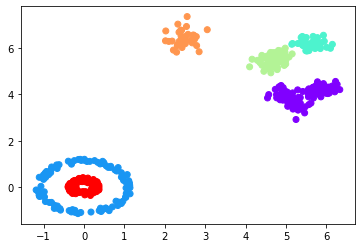

In [79]:
Amatrix = np.exp((- 1/(2 * 0.2)) * pairwise_distances(dataset, metric='euclidean'))
Lmatrix = csgraph.laplacian(Amatrix, normed=True)
lamda, v = np.linalg.eig(Lmatrix) #eigenvalues & eigenvectors of Laplacian matrix
#we want two clusters, we need the first two columns of eigenvectors
Y= v[:, :5]
clusters = kmeans.fit_predict(Y)
pyplot.scatter(dataset['col1'], dataset['col2'], c=clusters, cmap='rainbow')

As we can see, for every sigma value it can not find the rings..

Wow! For giving sigma 0.2 or 0.1 we have with kmeans with rbf kernel the perfect result!

# Now we will use silluete criterion to estimate K in kmeans!

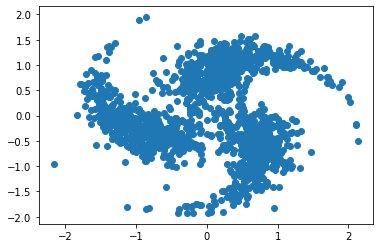

In [41]:
dataset = pd.read_fwf('3wings.txt', names=['col1','col2'])
dataset.to_csv('3wings.csv')
x=dataset.col1
y=dataset.col2
pyplot.scatter(x,y)

In [42]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=0).fit(dataset)
print(silhouette_score(dataset, kmeans.labels_)) #this is sihouette score.

0.5454302669642086


    1. Train a number of K-Means models using different values of K
    2. Record the average silhouette coefficient during each training
    3. Plot the silhouette score vs. number of clusters (K) graph
    4. Select the value of K for which silhouette score is the highest

/home/christina/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


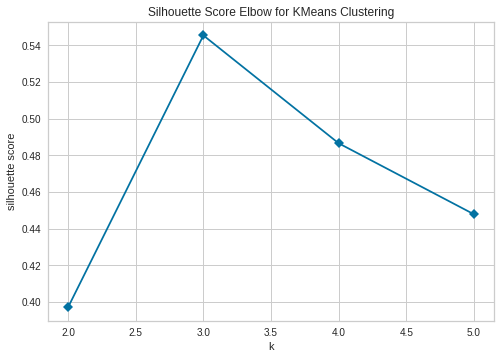

In [43]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False,locate_elbow=False)

# Fit the data and visualize
visualizer.fit(dataset)    
visualizer.poof()   


We can see that for K = 3, we get the highest average silhouette coefficient.

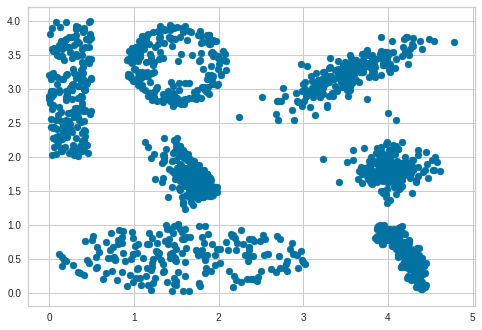

In [44]:
#Datase 6
dataset = pd.read_fwf('7clusters.txt', names=['col1','col2'])
dataset.to_csv('7clusters.csv')
x=dataset.col1
y=dataset.col2
pyplot.scatter(x, y)
# show the plot
pyplot.show()

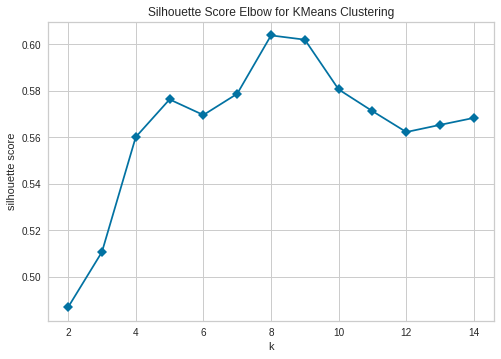

In [45]:
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=False, locate_elbow=False)

# Fit the data and visualize
visualizer.fit(dataset)    
visualizer.poof()   


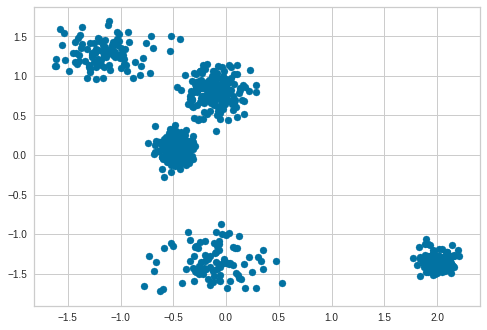

In [53]:
#Dataset 4
dataset = pd.read_fwf('5Gaussians.txt', names=['col1','col2'])
dataset.to_csv('5Gaussians.csv')
x=dataset.col1
y=dataset.col2
pyplot.scatter(x, y)
# show the plot
pyplot.show()

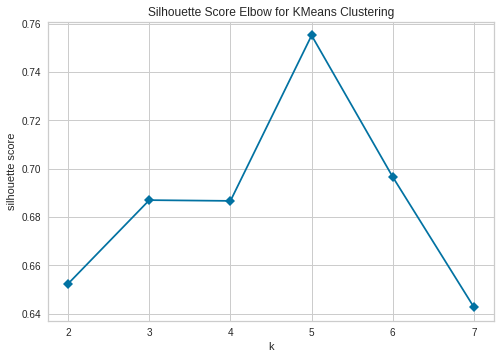

In [54]:
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False, locate_elbow=False)

# Fit the data and visualize
visualizer.fit(dataset)    
visualizer.poof() 